In [1]:
import os

import cv2
import matplotlib.pyplot as plt

In [2]:
BASE_DIR = 'input'
image_paths = os.listdir(BASE_DIR)
image_paths

['unknown (1).png', 'unknown (2).png', 'unknown (3).png', 'unknown.png']

In [3]:
f'{BASE_DIR}/{image_paths[0]}'

'input/unknown (1).png'

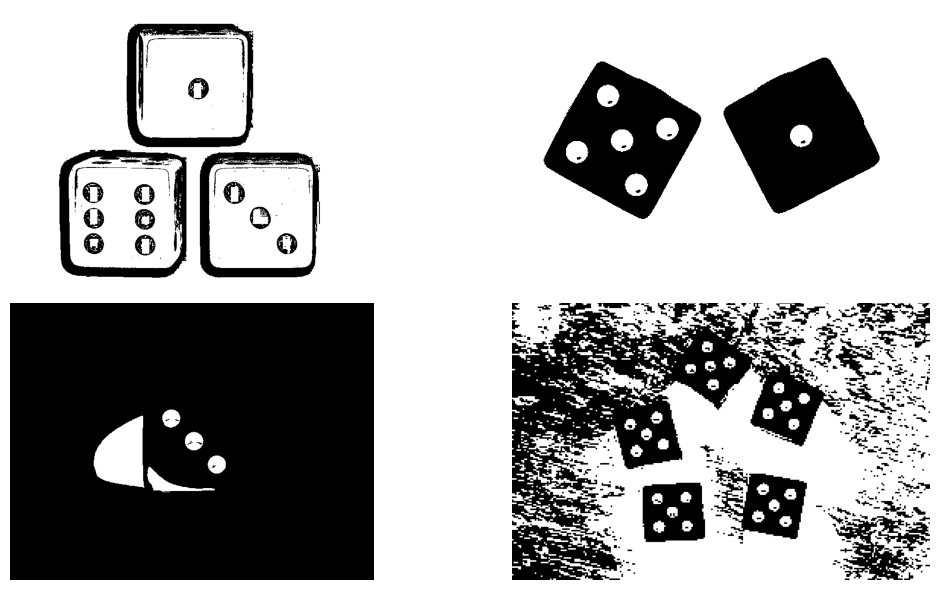

In [4]:
plt.figure(figsize=(12, 6))

for i, image in enumerate(image_paths):
    img = cv2.imread(f'{BASE_DIR}/{image}', cv2.IMREAD_GRAYSCALE)
    _, img_thresh = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_BINARY_INV)
    plt.subplot(2, 2, i + 1)
    plt.imshow(img_thresh, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

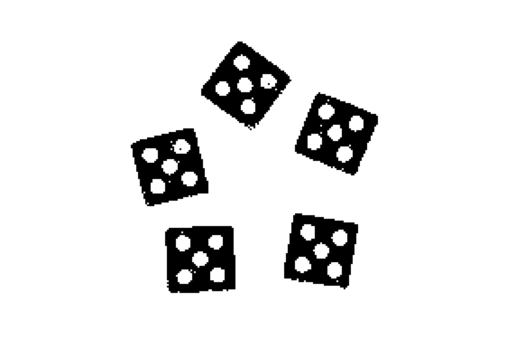

In [5]:
image_1 = cv2.imread('input/unknown.png', cv2.IMREAD_GRAYSCALE)
_, image_1_thresh = cv2.threshold(image_1, 220, 255, cv2.THRESH_BINARY_INV)
plt.axis('off')
plt.imshow(image_1_thresh, cmap='gray')
plt.show()

Dice Count : 5
Dice 1 : 5
Dice 2 : 5
Dice 3 : 5
Dice 4 : 5
Dice 5 : 5


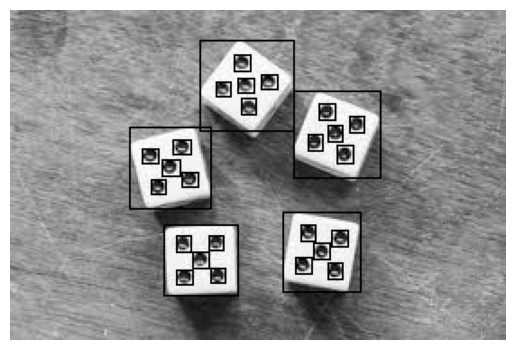

In [15]:
image_1 = cv2.imread('input/unknown.png', cv2.IMREAD_GRAYSCALE)
_, image_1_thresh = cv2.threshold(image_1, 220, 255, cv2.THRESH_BINARY_INV)

contours, hierarchy = cv2.findContours(image_1_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
result_1 = image_1_thresh.copy()
result_count = {}
for i, contour in enumerate(contours):
    if cv2.contourArea(contour) > 10:
        if hierarchy[0][i][3] == 0:
            result_count[i] = []
        for j in result_count:
            if hierarchy[0][i][3] == j:
                result_count[j].append(i)

for dice in result_count:
    if len(result_count[dice]) > 0:
        x, y, w, h = cv2.boundingRect(contours[dice])
        cv2.rectangle(image_1, (x, y), (x + w, y + h), (0, 255, 0), 1)
        for i in result_count[dice]:
            x, y, w, h = cv2.boundingRect(contours[i])
            cv2.rectangle(image_1, (x, y), (x + w, y + h), (0, 255, 0), 1)

print(f'Dice Count : {len(result_count)}')
for i, dice in enumerate(result_count):
    print(f'Dice {i + 1} : {len(result_count[dice])}')
plt.axis('off')
plt.imshow(image_1, cmap='gray')
plt.savefig('55.png')
plt.show()

Dice 2 : 3
Dice 3 : 6
Dice 4 : 1


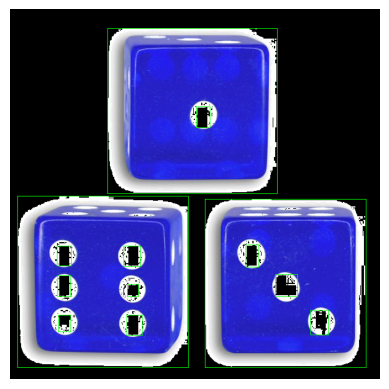

In [19]:
image_2 = cv2.imread('input/unknown (1).png')
image_2_gray = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)
_, image_2_thresh = cv2.threshold(image_2_gray, 50, 255, cv2.THRESH_BINARY_INV)

contours, hierarchy = cv2.findContours(image_2_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

result2_count = {}
for i, contour in enumerate(contours):
    if cv2.contourArea(contour) > 120:
        if hierarchy[0][i][3] == 0:
            result2_count[i] = []
        for j in result2_count:
            if hierarchy[0][i][3] == j:
                result2_count[j].append(i)

for dice in result2_count:
    if len(result2_count[dice]) > 0:
        x, y, w, h = cv2.boundingRect(contours[dice])
        cv2.rectangle(image_2, (x, y), (x + w, y + h), (0, 255, 0), 1)
        for i in result2_count[dice]:
            x, y, w, h = cv2.boundingRect(contours[i])
            cv2.rectangle(image_2, (x, y), (x + w, y + h), (0, 255, 0), 1)

for i, dice in enumerate(result2_count):
    if len(result2_count[dice]) == 0:
        continue
    print(f'Dice {i + 1} : {len(result2_count[dice])}')
plt.axis('off')
plt.imshow(image_2, cmap='gray')
plt.savefig('3.png')
plt.show()

Dice Count : 2
Dice 1 : 5
Dice 2 : 1


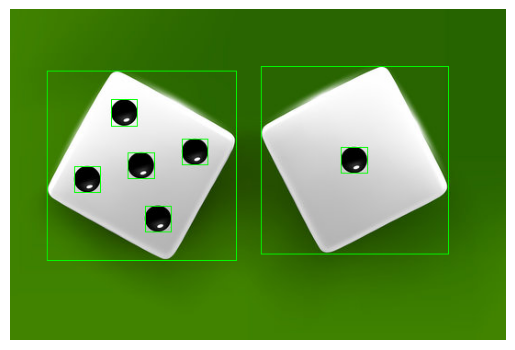

In [18]:
image_3 = cv2.imread('input/unknown (2).png')
image_3_gray = cv2.cvtColor(image_3, cv2.COLOR_BGR2GRAY)
_, image_3_thresh = cv2.threshold(image_3_gray, 100, 255, cv2.THRESH_BINARY_INV)

contours, hierarchy = cv2.findContours(image_3_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

result3_count = {}
for i, contour in enumerate(contours):
    if cv2.contourArea(contour) > 50:
        if hierarchy[0][i][3] == 0:
            result3_count[i] = []
        for j in result3_count:
            if hierarchy[0][i][3] == j:
                result3_count[j].append(i)

for dice in result3_count:
    if len(result3_count[dice]) > 0:
        x, y, w, h = cv2.boundingRect(contours[dice])
        cv2.rectangle(image_3, (x, y), (x + w, y + h), (0, 255, 0), 1)
        for i in result3_count[dice]:
            x, y, w, h = cv2.boundingRect(contours[i])
            cv2.rectangle(image_3, (x, y), (x + w, y + h), (0, 255, 0), 1)

print(f'Dice Count : {len(result3_count)}')
for i, dice in enumerate(result3_count):
    print(f'Dice {i + 1} : {len(result3_count[dice])}')
plt.axis('off')
plt.imshow(image_3, cmap='gray')
plt.savefig('2.png')
plt.show()

Dice 2 : 3


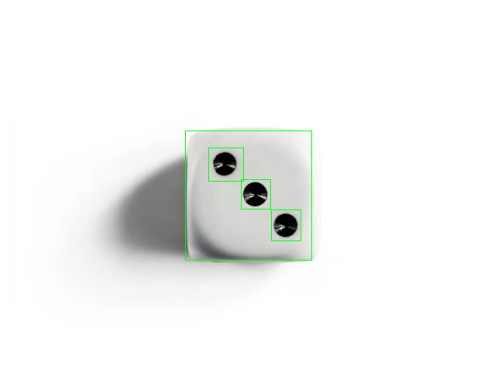

In [16]:
image_4 = cv2.imread('input/unknown (3).png')
image_4_gray = cv2.cvtColor(image_4, cv2.COLOR_BGR2GRAY)
image_4_gray[image_4_gray > 230] = 0
image_4_gray = cv2.blur(image_4_gray, (5, 5))
_, image_4_thresh = cv2.threshold(image_4_gray, 205, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(image_4_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

result4_count = {}
for i, contour in enumerate(contours):
    if cv2.contourArea(contour) > 120:
        if hierarchy[0][i][3] == -1:
            result4_count[i] = []
        for j in result4_count:
            if hierarchy[0][i][3] == j:
                result4_count[j].append(i)

for dice in result4_count:
    if len(result4_count[dice]) > 0:
        x, y, w, h = cv2.boundingRect(contours[dice])
        cv2.rectangle(image_4, (x, y), (x + w, y + h), (0, 255, 0), 1)
        for i in result4_count[dice]:
            x, y, w, h = cv2.boundingRect(contours[i])
            cv2.rectangle(image_4, (x, y), (x + w, y + h), (0, 255, 0), 1)

for i, dice in enumerate(result4_count):
    if len(result4_count[dice]) == 0:
        continue
    print(f'Dice {i + 1} : {len(result4_count[dice])}')

plt.axis('off')
plt.imshow(image_4, cmap='gray')
plt.savefig('13.png')
plt.show()